In [37]:
def is_peak(prev, val, thresh):
    z = (val - np.mean(prev)) / np.std(prev)
    return 0 if np.abs(z) > thresh else np.sign(z)

def running_peaks(arr, k, i, z):
    arr = np.array(arr)
    modified = arr.copy()
    peaks = np.zeros_like(arr)
    for j in range(len(arr) - k - 1):
        prev = arr[j:j+k]
        peaks[j+k+1] = is_peak(prev, arr[j+k+1], z)
        if peaks[j+k+1] != 0:
            modified[j+k+1] = modified[j+k+1] * i + modified[j+k] * (1 - i)
    return peaks

def count_jumps(peaks):
    return sum((peaks[1:] == 1) & (peaks[:-1] != 1))

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(f'data_10.csv')

24


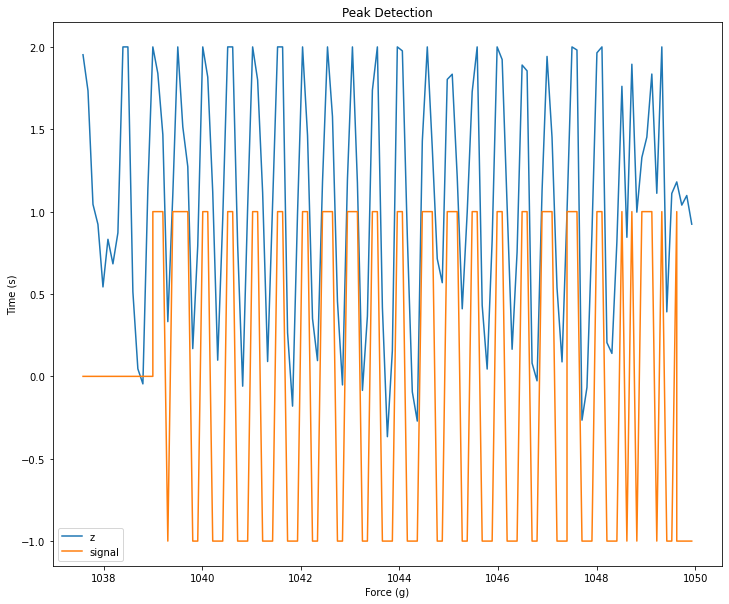

In [43]:
t = df.time / 1000
z = df.z
peaks = running_peaks(z, 40, 0.1, 2.5)

plt.subplots(figsize=(12, 10))
plt.plot(t, z, label='z')
plt.plot(t, peaks, label='signal')
plt.xlabel('Force (g)')
plt.ylabel('Time (s)')
plt.title('Peak Detection')
plt.legend()
plt.savefig('peak_graph.jpg')
print(count_jumps(peaks))

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def load_and_save_ani(csv, name, keys=['x', 'y', 'z']):
    df = pd.read_csv(csv)
    df.time /= 1000
    plot_len = 3
    df = df[::3]
    df.signal = np.maximum(df.signal, 0)
    time_diff = np.diff(df.time.values).mean()
    num_points = int(np.ceil(plot_len / time_diff))
    
    fig, ax = plt.subplots()

    lines = {}
    for col in keys:
        lines[col], = ax.plot(df.time[:num_points], df[col][:num_points], label=col)
    plt.legend(loc='upper right')
    plt.xlabel('Time (s)')
    plt.ylabel('Force (g)')
    ax.set_ylim(-2.5, 2.5)
    
    bar, = ax.plot([df.iloc[0].time] * 2, [-2.5, 2.5])
    offset = 5

    def func(j):
        i = min(max(j, 0), len(df) - num_points)
        x = df[i:i+num_points].time
        stime = df.iloc[0].time + j * time_diff
        bar.set_xdata(stime + offset * time_diff)
        ax.set_xlim(stime, stime + num_points * time_diff)
        for key in keys:
            lines[key].set_xdata(x)
            lines[key].set_ydata(df[i:i+num_points][key])
        return tuple([lines[k] for k in keys] + [bar])


    ani = animation.FuncAnimation(fig, func, frames=range(-offset, len(df) - offset), interval=time_diff * 1000, blit=False)
    ani.save(name)
    

for i in range(5):
    f'vids/data_{i+5}.csv'
    f"plot_{i+1}.mp4"

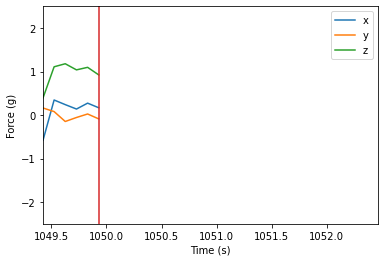

In [49]:
load_and_save_ani('data_10.csv', 'final_plot.mp4')

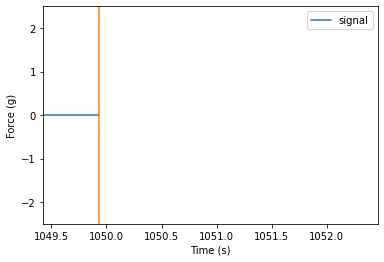

In [52]:
load_and_save_ani('data_10.csv', 'final_plot_signal.mp4', keys=['signal'])